In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Config

features = pd.read_csv('../data/processed/pre_match_features.csv')
# Display first few rows of the dataframe
features.head()

,fighter_id,opponent_id,match_date,ratings_diff,experience_diff,days_since_last_fought_diff,fighter_days_since_last_fought,opponent_days_since_last_fought,division,stage,label
0,376,356,2013-07-01,0.0,0,0,365,365,Mixed Steel Longsword,NaN,0
1,376,637,2013-07-01,0.0,1,0,365,365,Mixed Steel Longsword,NaN,0
2,376,635,2013-07-01,0.0,2,0,365,365,Mixed Steel Longsword,NaN,0
3,376,326,2013-07-01,0.0,3,0,365,365,Mixed Steel Longsword,NaN,0
4,376,576,2013-07-01,0.0,4,0,365,365,Mixed Steel Longsword,NaN,0


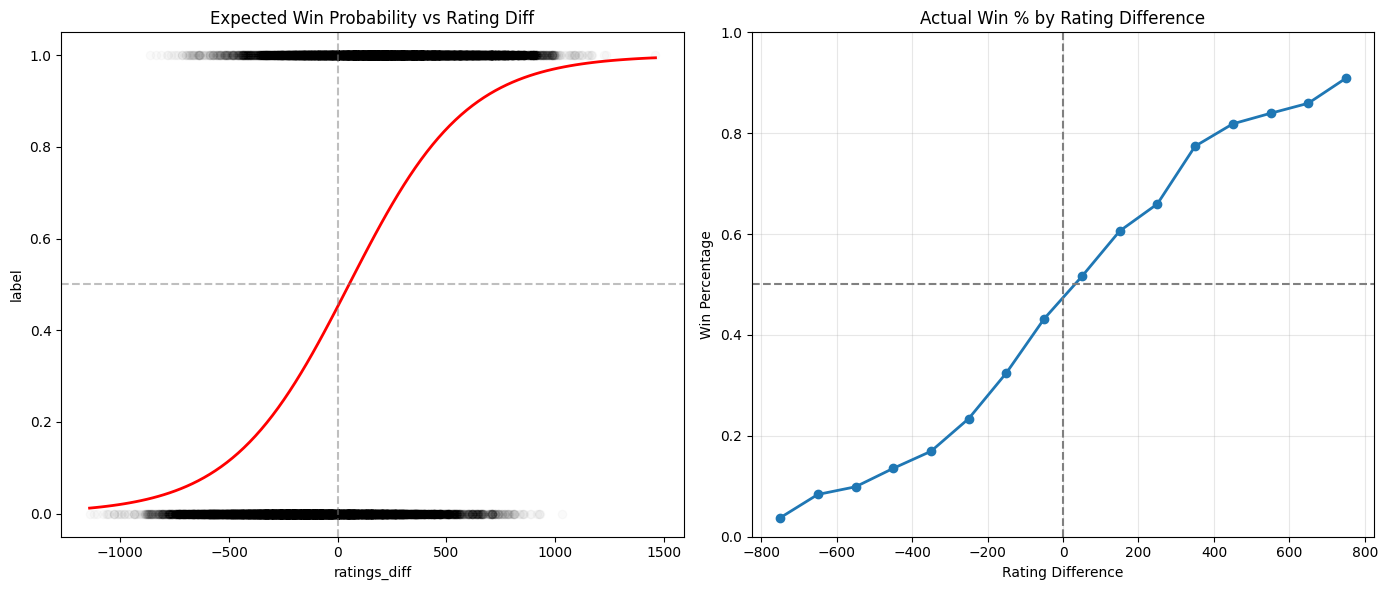

In [6]:
# 2. Setup the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot A: The Logistic Fit (Model View) ---
# sns.regplot with logistic=True automatically fits the Sigmoid curve
sns.regplot(
    x='ratings_diff', 
    y='label', 
    data=features, 
    logistic=True, 
    ci=None, 
    scatter_kws={'alpha': 0.02, 'color': 'black'}, # High transparency helps visualize density
    line_kws={'color': 'red', 'linewidth': 2},
    ax=axes[0]
)
axes[0].set_title("Expected Win Probability vs Rating Diff")
axes[0].axhline(0.5, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(0, color='gray', linestyle='--', alpha=0.5)

# --- Plot B: Binned Win Rates (Reality View) ---
# Create bins every 100 points (adjust range as needed)
bins = np.arange(-800, 900, 100) 
features['bin'] = pd.cut(features['ratings_diff'], bins=bins)

# Calculate win rate per bin
bin_stats = features.groupby('bin', observed=True)['label'].mean().reset_index()
bin_stats['bin_center'] = bin_stats['bin'].apply(lambda x: x.mid)

# Plot
axes[1].plot(bin_stats['bin_center'], bin_stats['label'], marker='o', linewidth=2)
axes[1].set_title("Actual Win % by Rating Difference")
axes[1].set_xlabel("Rating Difference")
axes[1].set_ylabel("Win Percentage")
axes[1].axhline(0.5, color='gray', linestyle='--')
axes[1].axvline(0, color='gray', linestyle='--')
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
features.head()

   fighter_id  opponent_id  match_date  ratings_diff  experience_diff  \
0         376          356  2013-07-01           0.0                0   
1         376          637  2013-07-01           0.0                1   
2         376          635  2013-07-01           0.0                2   
3         376          326  2013-07-01           0.0                3   
4         376          576  2013-07-01           0.0                4   

   days_since_last_fought_diff  fighter_days_since_last_fought  \
0                            0                             365   
1                            0                             365   
2                            0                             365   
3                            0                             365   
4                            0                             365   

   opponent_days_since_last_fought               division stage  label  \
0                              365  Mixed Steel Longsword   NaN      0   
1               